In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Importing the necessary libraries and the data file

In [6]:
# Importing necessary libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [7]:
pd.set_option("display.max_rows",None)        # used to display all the rows
pd.set_option("display.max_columns",None)     # used to display all the columns

In [8]:
# Reading the file

ccf_train = pd.read_csv('/content/gdrive/MyDrive/Capstone_project/fraudTrain.csv')
ccf_test = pd.read_csv('/content/gdrive/MyDrive/Capstone_project/fraudTest.csv')

In [9]:
# Checking the shape of the application file

ccf_train.shape, ccf_test.shape

((1296675, 23), (555719, 23))

In [10]:
# Displaying first 5 records of the data

ccf_train.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [11]:
# Checking the unique values

ccf_train.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [12]:
# Fetching the column along with Non-null values and data type of the column

ccf_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

##### The following columns can be dropped, as most of them are not relevant to our target variable.

##### Since the PIN code indicates the location, we can remove the columns 'street', 'city', and 'state'.

In [13]:
ccf_train = ccf_train.drop(['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'merchant', 'state', 'city', 'job', 'trans_num'],axis=1)

In [14]:
ccf_train.shape

(1296675, 13)

In [15]:
# Converting DOB column to datetime

ccf_train['dob'] = pd.to_datetime(ccf_train['dob'])
ccf_train['trans_date_trans_time'] = pd.to_datetime(ccf_train['trans_date_trans_time'])

In [16]:
# Calculating age as on transaction date

ccf_train['Age'] = (
    ccf_train['trans_date_trans_time'].dt.year - ccf_train['dob'].dt.year
) - (
    (ccf_train['trans_date_trans_time'].dt.month < ccf_train['dob'].dt.month) |
    (
        (ccf_train['trans_date_trans_time'].dt.month == ccf_train['dob'].dt.month) &
        (ccf_train['trans_date_trans_time'].dt.day < ccf_train['dob'].dt.day)
    )
)

In [17]:
# Dropping the column 'dob' as age indicates the same

ccf_train = ccf_train.drop(['dob'],axis=1)

In [18]:
# Extracting Month, Day, hour and minute from the "transaction date and transaction time column"

ccf_train['month_of_trans'] = ccf_train['trans_date_trans_time'].dt.month
ccf_train['day_of_trans'] = ccf_train['trans_date_trans_time'].dt.day
ccf_train['hour_of_trans'] = ccf_train['trans_date_trans_time'].dt.hour
ccf_train['min_of_trans'] = ccf_train['trans_date_trans_time'].dt.minute

# Converting to integer datatype
ccf_train['month_of_trans'] = ccf_train['month_of_trans'].astype('Int64')
ccf_train['day_of_trans'] = ccf_train['day_of_trans'].astype('Int64')
ccf_train['hour_of_trans'] = ccf_train['hour_of_trans'].astype('Int64')
ccf_train['min_of_trans'] = ccf_train['min_of_trans'].astype('Int64')

In [19]:
# Dropping the trans_date_trans_time column

ccf_train = ccf_train.drop(['trans_date_trans_time'],axis=1)

In [20]:
# Function to compute haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers (use 3958.8 for miles)

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply vectorized computation
ccf_train['distance_km'] = haversine(
    ccf_train['lat'], ccf_train['long'],
    ccf_train['merch_lat'], ccf_train['merch_long']
)

In [21]:
# Dropping columns 'merch_lat','lat','merch_long','long' as we have now distance b/w merchant location and location of customer.

ccf_train = ccf_train.drop(['merch_lat','lat','merch_long','long'],axis=1)

<Axes: >

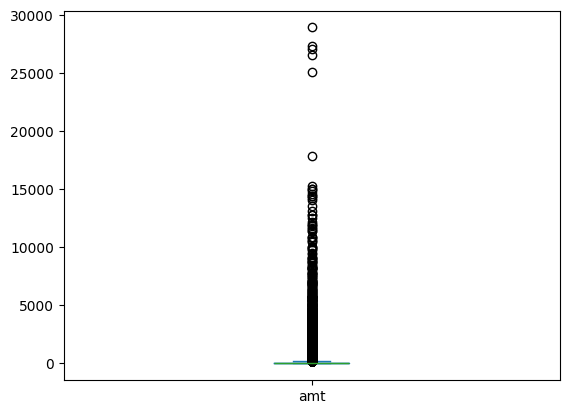

In [22]:
# Checking the distribution of 'Amount' in the data

ccf_train['amt'].plot.box()

<Axes: >

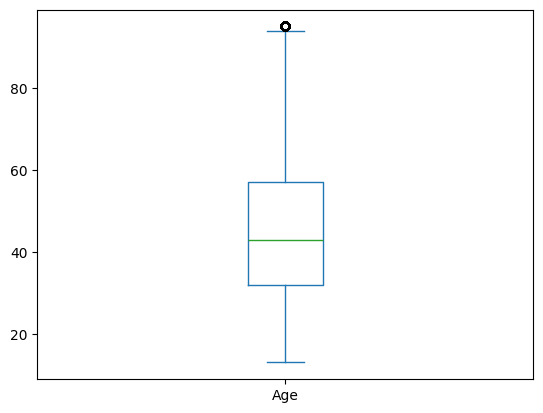

In [23]:
# Checking the distribution of 'Age' in the data

ccf_train['Age'].plot.box()

In [24]:
ccf_train['Age'].describe()

count    1.296675e+06
mean     4.549688e+01
std      1.739702e+01
min      1.300000e+01
25%      3.200000e+01
50%      4.300000e+01
75%      5.700000e+01
max      9.500000e+01
Name: Age, dtype: float64

In [25]:
# Defining bins and labels for Age column
bins = [10, 30, 40, 50, 60, 70, 80, 90, 100, 120]  # boundaries
labels = ['10-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']

# Create binned column
ccf_train['AgeGroup'] = pd.cut(ccf_train['Age'], bins=bins, labels=labels, right=False)

In [26]:
# Defining bins and labels for Amount column
bins = [0, 5000, 10000, 15000, 20000, 30000]  # boundaries
labels = ['<5000', '5000-10000', '10000-15000', '15000-20000', '>20000']

# Create binned column
ccf_train['Amount_Group'] = pd.cut(ccf_train['amt'], bins=bins, labels=labels, right=False)

In [27]:
ccf_train.AgeGroup.value_counts()

AgeGroup
40-50     304319
30-40     291316
10-30     244054
50-60     184964
60-70     136485
70-80      72893
80-90      42299
90-100     20345
>100           0
Name: count, dtype: int64

In [28]:
ccf_train.Amount_Group.value_counts()

Amount_Group
<5000          1296539
5000-10000         102
10000-15000         25
>20000               5
15000-20000          4
Name: count, dtype: int64

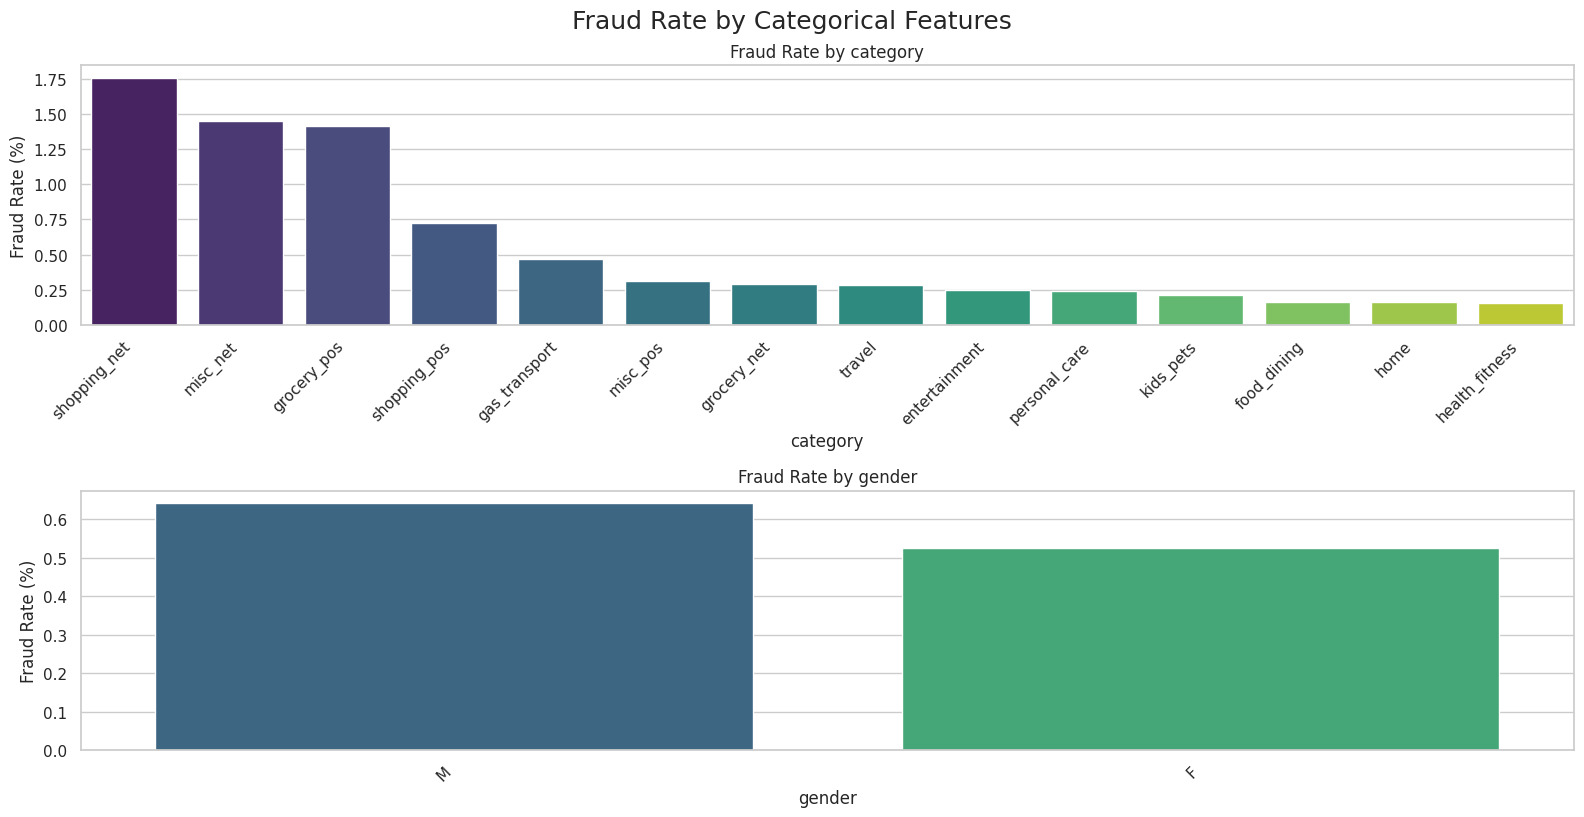

In [29]:
# List of categorical columns to compare
cat_col = ['category', 'gender']

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4 * len(cat_col)))

for i, col in enumerate(cat_col, 1):
    plt.subplot(len(cat_col), 1, i)
    temp = ccf_train.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
    sns.barplot(x=temp.index, y=temp.values*100, palette="viridis")
    plt.ylabel('Fraud Rate (%)')
    plt.title(f'Fraud Rate by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.suptitle("Fraud Rate by Categorical Features", fontsize=18, y=1.02)
plt.show()

In [30]:
# Segregating Categorical columns and Numerical columns

cat_col=[]
num_col=[]
for i in ccf_train.columns:
    if ccf_train[i].nunique()>30:
        num_col.append(i)
    else:
        cat_col.append(i)

category
gas_transport     10.153585
grocery_pos        9.535003
home               9.494669
shopping_pos       8.997783
kids_pets          8.717296
shopping_net       7.522548
entertainment      7.250390
food_dining        7.053502
personal_care      6.999287
health_fitness     6.623017
misc_pos           6.143020
misc_net           4.880714
grocery_net        3.505273
travel             3.123913
Name: count, dtype: float64 2


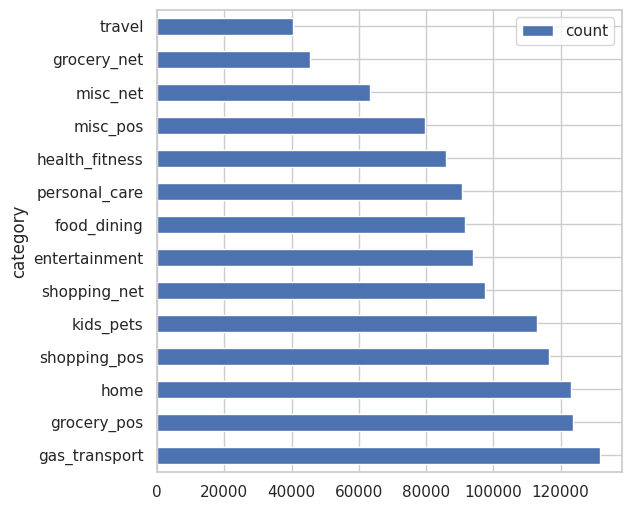

gender
F    54.744867
M    45.255133
Name: count, dtype: float64 2


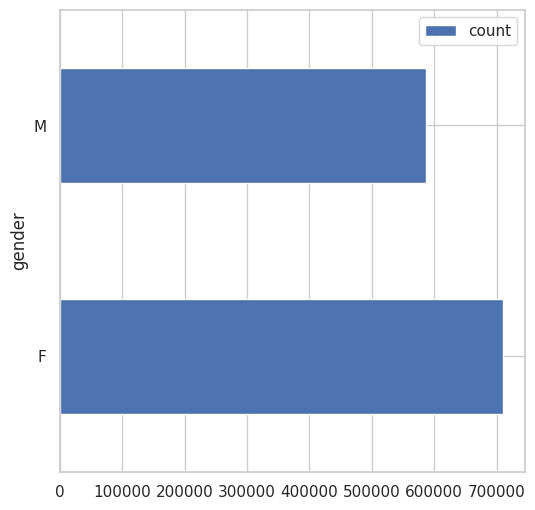

is_fraud
0    99.421135
1     0.578865
Name: count, dtype: float64 2


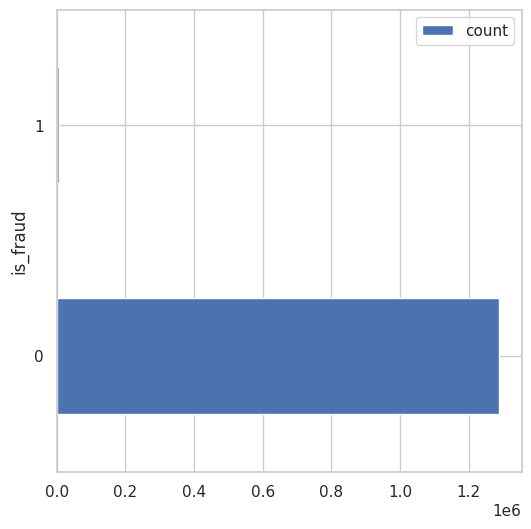

month_of_trans
5     11.327048
6     11.090751
3     11.089055
12    10.878593
4     10.408931
1       8.07658
2       7.53134
8      6.737155
7      6.678312
9      5.448705
11     5.430891
10     5.302639
Name: count, dtype: Float64 2


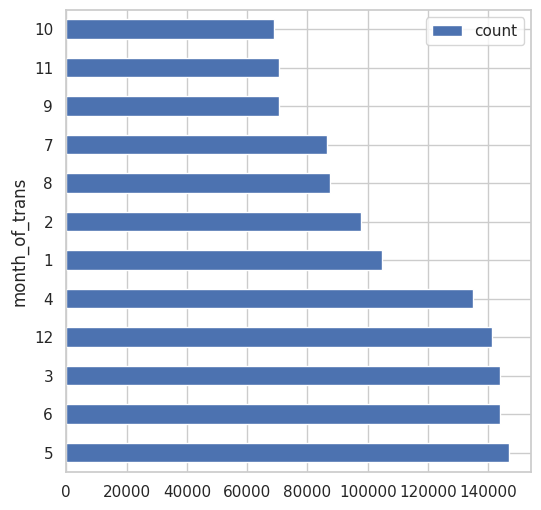

hour_of_trans
23    5.175082
22    5.165674
18    5.093875
16    5.068811
21    5.053926
19    5.051998
17    5.047525
15    5.042975
13    5.037037
12    5.032641
20    5.020379
14    5.003952
1     3.306071
3     3.298359
2     3.289645
8     3.277999
0     3.277768
6      3.26219
10    3.259953
7     3.254709
9     3.253321
5     3.252241
11    3.245378
4     3.228488
Name: count, dtype: Float64 2


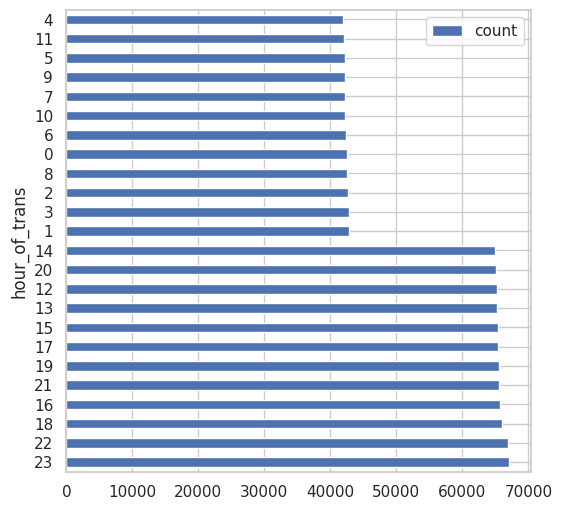

AgeGroup
40-50     23.469181
30-40     22.466385
10-30     18.821524
50-60     14.264484
60-70     10.525768
70-80      5.621532
80-90      3.262113
90-100     1.569013
>100       0.000000
Name: count, dtype: float64 2


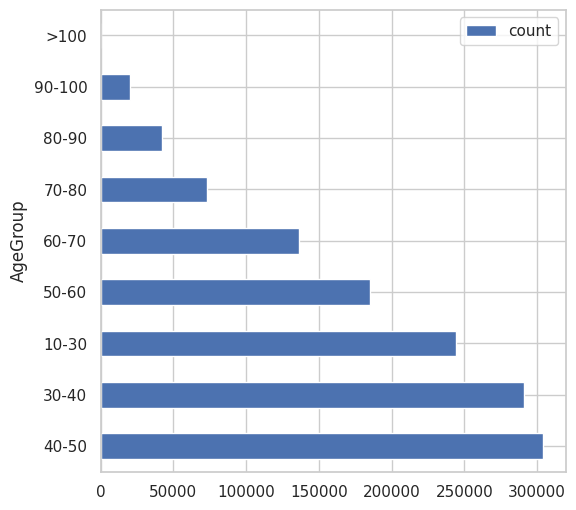

Amount_Group
<5000          99.989512
5000-10000      0.007866
10000-15000     0.001928
>20000          0.000386
15000-20000     0.000308
Name: count, dtype: float64 2


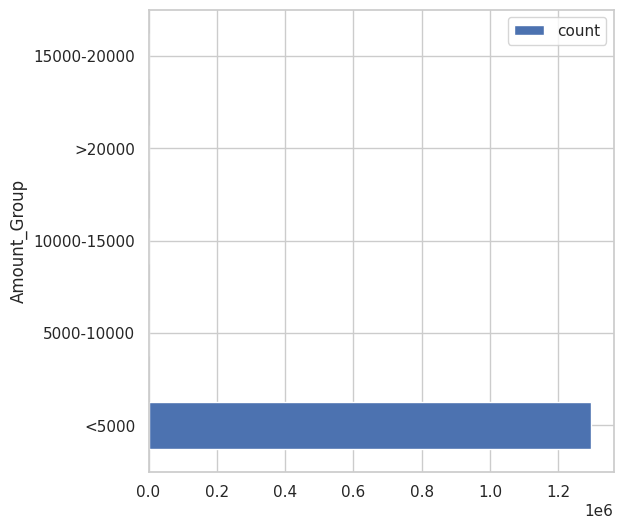

In [31]:
# univariate Analysis on training data

for i in cat_col:
    print(100*(ccf_train[i].value_counts()/len(ccf_train.index)),2)
    plt.figure(figsize= (6,6))
    ccf_train[i].value_counts().plot.barh()
    plt.legend()
    plt.show()

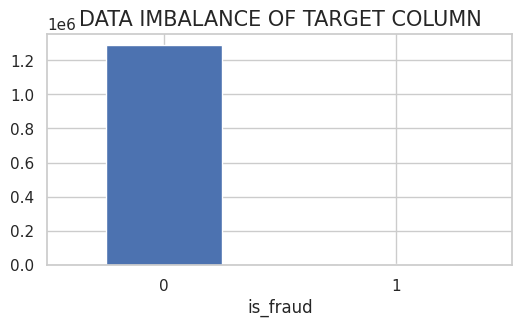

In [32]:
# Data imbalance in "is_fraud" variable
plt.figure(figsize= (6,3))
ccf_train.is_fraud.value_counts().plot.bar()
plt.title('DATA IMBALANCE OF TARGET COLUMN',fontsize=15)
plt.xticks(rotation=0)
plt.show()

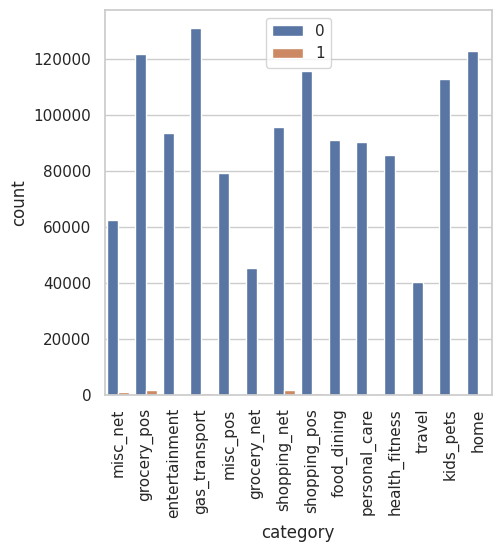

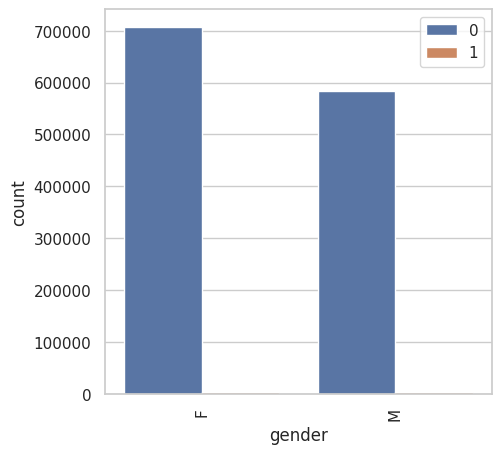

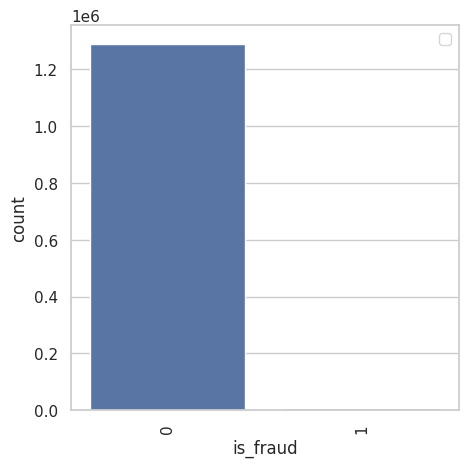

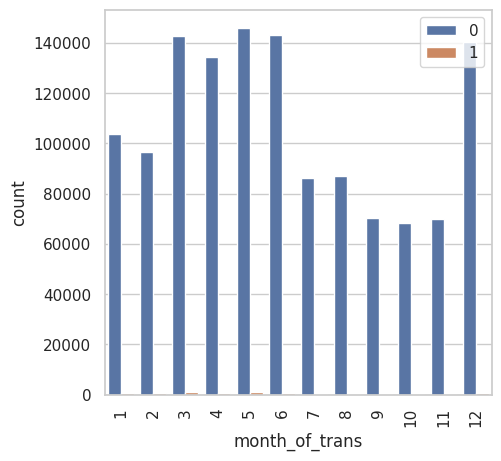

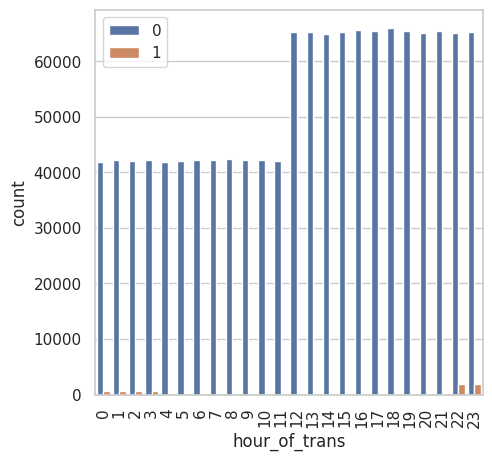

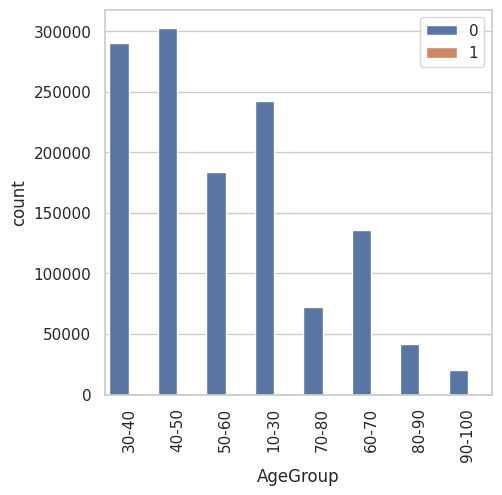

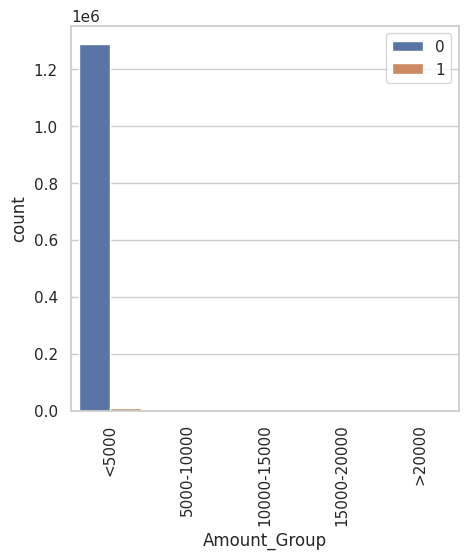

In [33]:
# Bivariate analysis between is_fraud column and other training columns

for col in cat_col:
    ccf_train[col] = ccf_train[col].astype(str)

for i in cat_col:
    plt.figure(figsize= (5,5))
    sns.countplot(x = i, hue = 'is_fraud', data = ccf_train)
    plt.xticks(rotation = 90)
    plt.legend()
plt.show()

In [34]:
ccf_train['month_of_trans'] = ccf_train['month_of_trans'].astype('Int64')
ccf_train['day_of_trans'] = ccf_train['day_of_trans'].astype('Int64')
ccf_train['hour_of_trans'] = ccf_train['hour_of_trans'].astype('Int64')
ccf_train['min_of_trans'] = ccf_train['min_of_trans'].astype('Int64')
ccf_train['is_fraud'] = ccf_train['is_fraud'].astype('Int64')

In [35]:
ccf_train[['is_fraud', 'amt','zip', 'city_pop', 'unix_time','Age',
     'month_of_trans','day_of_trans','hour_of_trans','min_of_trans','distance_km']].corr(method='pearson', min_periods=1, numeric_only=False)

is_fraud       amt       zip  city_pop  unix_time       Age  \
is_fraud        1.000000  0.219404 -0.002162  0.002136  -0.005078  0.012248   
amt             0.219404  1.000000  0.001843  0.005818  -0.000293 -0.009755   
zip            -0.002162  0.001843  1.000000  0.078467   0.000670  0.010699   
city_pop        0.002136  0.005818  0.078467  1.000000  -0.001714 -0.092433   
unix_time      -0.005078 -0.000293  0.000670 -0.001714   1.000000  0.019739   
Age             0.012248 -0.009755  0.010699 -0.092433   0.019739  1.000000   
month_of_trans -0.012409 -0.001748  0.000852  0.000137   0.184868  0.006668   
day_of_trans    0.003848  0.000629 -0.000607  0.000159   0.017162  0.000970   
hour_of_trans   0.013799 -0.022811  0.005938  0.020381   0.000756 -0.173014   
min_of_trans    0.001033  0.000383  0.000766 -0.000713   0.000006 -0.000698   
distance_km     0.000403 -0.001085  0.006183  0.010901  -0.000633 -0.004605   

                month_of_trans  day_of_trans  hour_of_trans  min_of_trans  \
is_fraud             -0.012409      0.003848       0.013799      0.001033   
amt                  -0.001748      0.000629      -0.022811      0.000383   
zip                   0.000852     -0.000607       0.005938      0.000766   
city_pop              0.000137      0.000159       0.020381     -0.000713   
unix_time             0.184868      0.017162       0.000756      0.000006   
Age                   0.006668      0.000970      -0.173014     -0.000698   
month_of_trans        1.000000      0.012434      -0.000356      0.000244   
day_of_trans          0.012434      1.000000      -0.000170     -0.000884   
hour_of_trans        -0.000356     -0.000170       1.000000     -0.000620   
min_of_trans          0.000244     -0.000884      -0.000620      1.000000   
distance_km           0.000098     -0.000594       0.000332      0.000049   

                distance_km  
is_fraud           0.000403  
amt               -0.001085  
zip                0.006183  
city_pop           0.010901  
unix_time         -0.000633  
Age               -0.004605  
month_of_trans     0.000098  
day_of_trans      -0.000594  
hour_of_trans      0.000332  
min_of_trans       0.000049  
distance_km        1.000000

## Making similar changes in test dataset

In [36]:
# Checking the shape of the application file

ccf_test.shape

(555719, 23)

In [37]:
# Displaying first 5 records of the data

ccf_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [38]:
# Checking the unique values in the test dataset

ccf_test.nunique()

Unnamed: 0               555719
trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

In [39]:
# Checking the columns with percentage of null values in descending order

ccf_test.isnull().sum().sort_values(ascending=False)

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

##### The following columns can be dropped, as most of them are not relevant to our target variable.

##### Since the PIN code indicates the location, we can remove the columns 'street', 'city', and 'state'.

In [40]:
ccf_test = ccf_test.drop(['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'merchant', 'state', 'job', 'trans_num'],axis=1)

In [41]:
ccf_test.shape

(555719, 13)

In [42]:
# Converting DOB column to datetime format

ccf_test['dob'] = pd.to_datetime(ccf_test['dob'])
ccf_test['trans_date_trans_time'] = pd.to_datetime(ccf_test['trans_date_trans_time'])

In [43]:
# Calculating age as on transaction date

ccf_test['Age'] = (
    ccf_test['trans_date_trans_time'].dt.year - ccf_test['dob'].dt.year
) - (
    (ccf_test['trans_date_trans_time'].dt.month < ccf_test['dob'].dt.month) |
    (
        (ccf_test['trans_date_trans_time'].dt.month == ccf_test['dob'].dt.month) &
        (ccf_test['trans_date_trans_time'].dt.day < ccf_test['dob'].dt.day)
    )
)

In [44]:
# Dropping the DOB column as we have age of the customer now

ccf_test = ccf_test.drop(['dob'],axis=1)

In [45]:
# Extracting Month, Day, hour and minute

ccf_test['month_of_trans'] = ccf_test['trans_date_trans_time'].dt.month
ccf_test['day_of_trans'] = ccf_test['trans_date_trans_time'].dt.day
ccf_test['hour_of_trans'] = ccf_test['trans_date_trans_time'].dt.hour
ccf_test['min_of_trans'] = ccf_test['trans_date_trans_time'].dt.minute

# Converting to integer datatype
ccf_test['month_of_trans'] = ccf_test['month_of_trans'].astype('Int64')
ccf_test['day_of_trans'] = ccf_test['day_of_trans'].astype('Int64')
ccf_test['hour_of_trans'] = ccf_test['hour_of_trans'].astype('Int64')
ccf_test['min_of_trans'] = ccf_test['min_of_trans'].astype('Int64')

In [46]:
# Dropping the trans_date_trans_time as we have extracted date, month, hour and minute

ccf_test = ccf_test.drop(['trans_date_trans_time'],axis=1)

In [47]:
# Function to compute haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers (use 3958.8 for miles)

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply vectorized computation
ccf_test['distance_km'] = haversine(
    ccf_test['lat'], ccf_test['long'],
    ccf_test['merch_lat'], ccf_test['merch_long']
)

In [48]:
# Dropping 'merch_lat','lat','merch_long','long' as we have distance column.

ccf_test = ccf_test.drop(['merch_lat','lat','merch_long','long'],axis=1)

<Axes: >

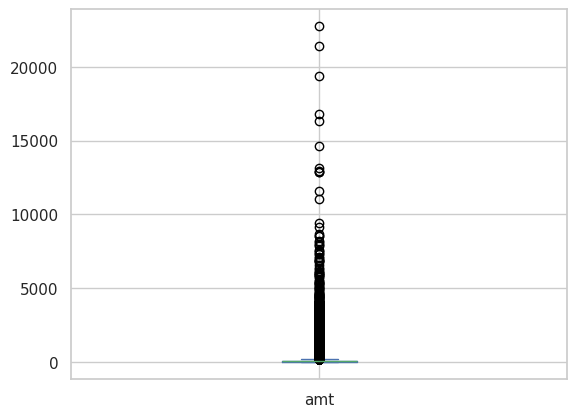

In [49]:
# Checking the distribution of amount in test data

ccf_test['amt'].plot.box()

<Axes: >

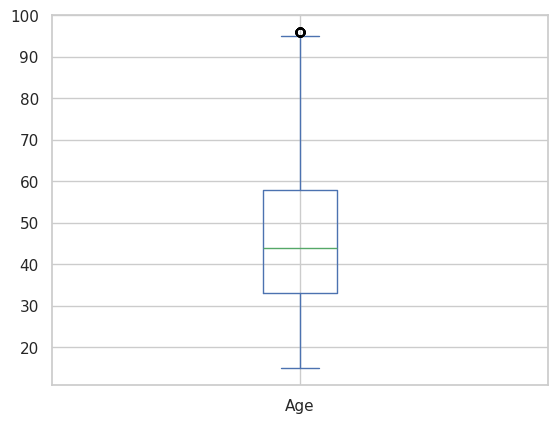

In [50]:
# Checking the distribution of Age in test data

ccf_test['Age'].plot.box()

In [51]:
# Defining bins and labels
bins = [10, 30, 40, 50, 60, 70, 80, 90, 100, 120]  # boundaries
labels = ['10-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100']

# Creating binned column
ccf_test['AgeGroup'] = pd.cut(ccf_test['Age'], bins=bins, labels=labels, right=False)

In [52]:
# Defining bins and labels
bins = [0, 5000, 10000, 15000, 20000, 30000]  # boundaries
labels = ['<5000', '5000-10000', '10000-15000', '15000-20000', '>20000']

# Creating binned column
ccf_test['Amount_Group'] = pd.cut(ccf_test['amt'], bins=bins, labels=labels, right=False)

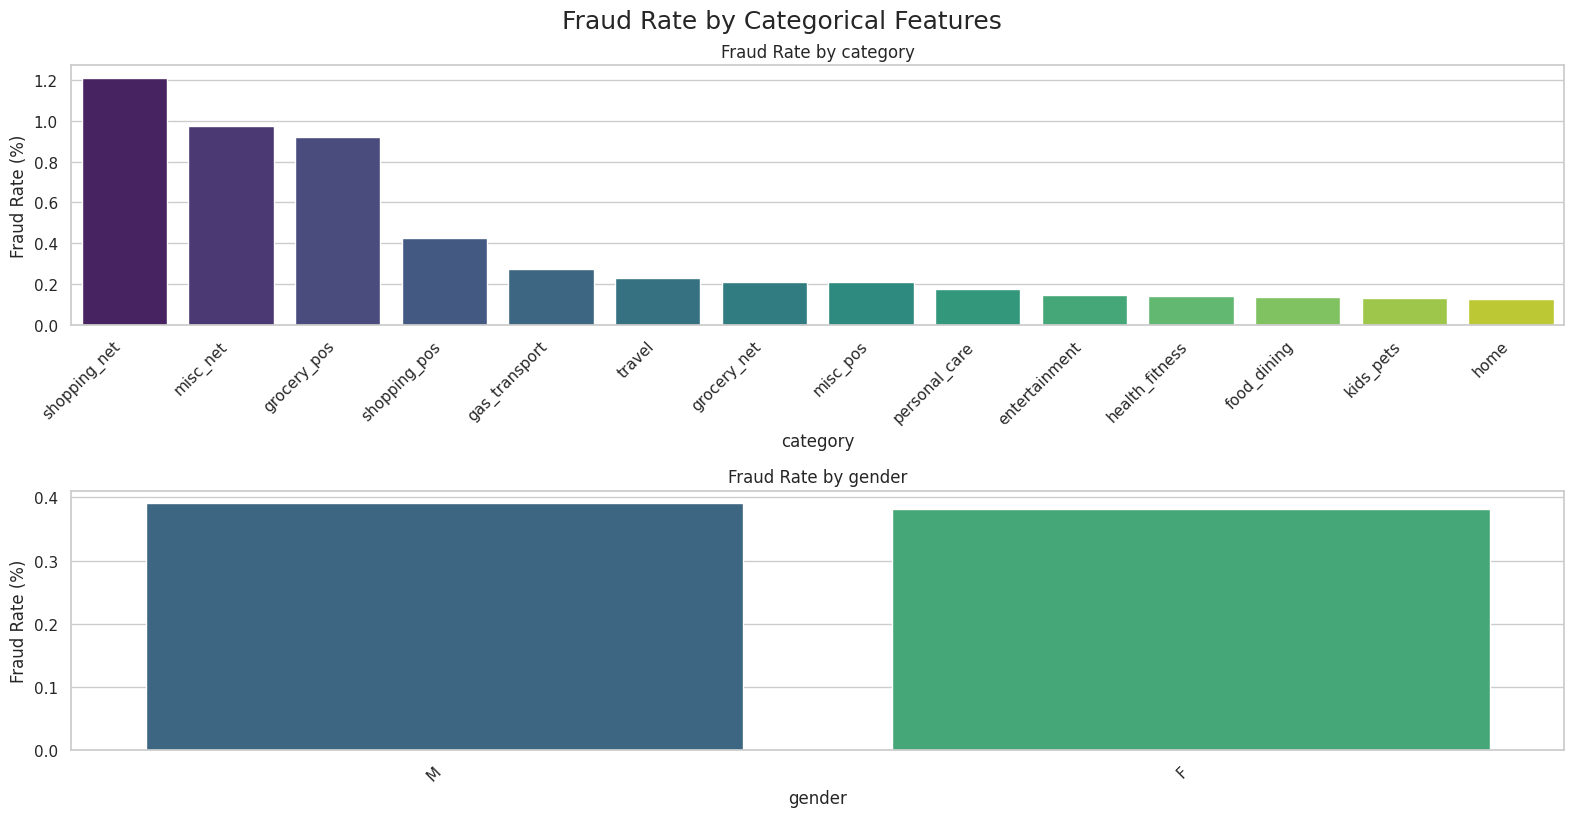

In [53]:
# List of categorical columns to compare
cat_col = ['category', 'gender']

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4 * len(cat_col)))

for i, col in enumerate(cat_col, 1):
    plt.subplot(len(cat_col), 1, i)
    temp = ccf_test.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
    sns.barplot(x=temp.index, y=temp.values*100, palette="viridis")
    plt.ylabel('Fraud Rate (%)')
    plt.title(f'Fraud Rate by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.suptitle("Fraud Rate by Categorical Features", fontsize=18, y=1.02)
plt.show()

In [54]:
# Segregating Categorical columns and Numerical columns

cat_col=[]
num_col=[]
for i in ccf_test.columns:
    if ccf_test[i].nunique()>30:
        num_col.append(i)
    else:
        cat_col.append(i)

category
gas_transport     10.143616
grocery_pos        9.456758
home               9.419329
shopping_pos       8.959744
kids_pets          8.761982
shopping_net       7.518008
entertainment      7.216597
personal_care      7.076778
food_dining        7.066161
health_fitness     6.599378
misc_pos           6.221490
misc_net           4.924611
grocery_net        3.495652
travel             3.139896
Name: count, dtype: float64 2


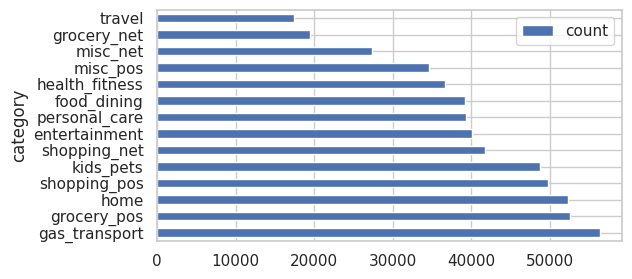

gender
F    54.863339
M    45.136661
Name: count, dtype: float64 2


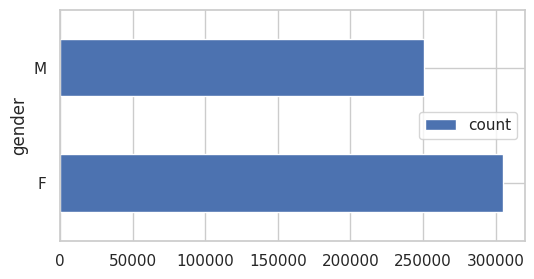

is_fraud
0    99.614014
1     0.385986
Name: count, dtype: float64 2


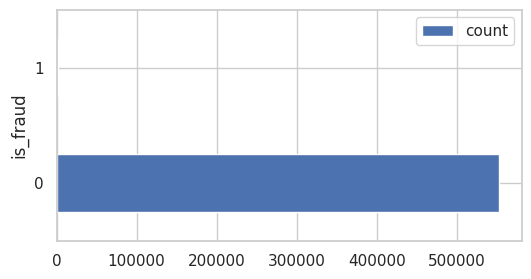

month_of_trans
12    25.109453
8     15.971921
7     15.448095
11    13.070455
9     12.512259
10    12.478969
6      5.408849
Name: count, dtype: Float64 2


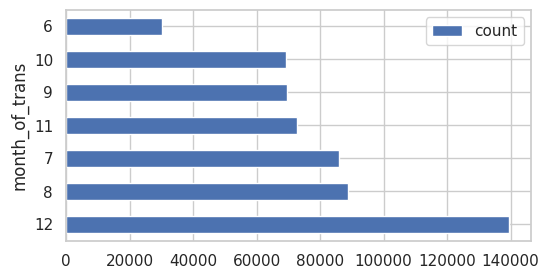

hour_of_trans
23    5.182115
16    5.139828
22    5.108337
21    5.075407
14    5.075227
13    5.070548
17    5.050034
15    5.047155
12    5.045176
18    5.038698
20    5.035459
19    5.025022
1     3.322003
3     3.274857
0     3.266579
2      3.26424
6     3.258121
7     3.256682
11    3.254882
4     3.252543
10    3.247864
9     3.247325
8     3.237787
5     3.224111
Name: count, dtype: Float64 2


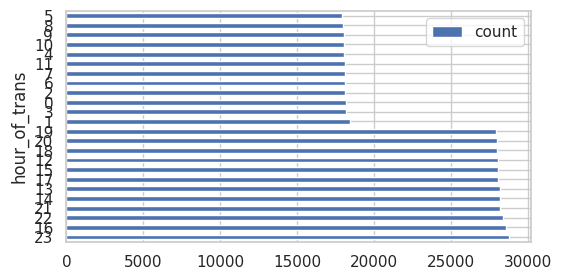

AgeGroup
40-50     23.242502
30-40     22.964304
10-30     16.918083
50-60     14.728847
60-70     10.944200
70-80      5.927816
80-90      3.420614
90-100     1.853635
>100       0.000000
Name: count, dtype: float64 2


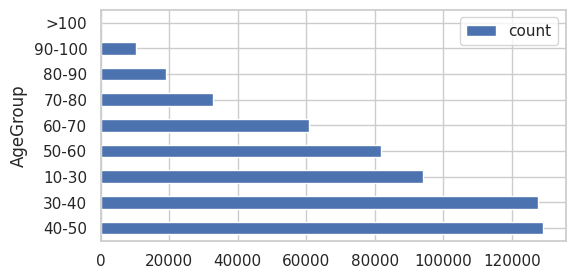

Amount_Group
<5000          99.989383
5000-10000      0.008458
10000-15000     0.001260
15000-20000     0.000540
>20000          0.000360
Name: count, dtype: float64 2


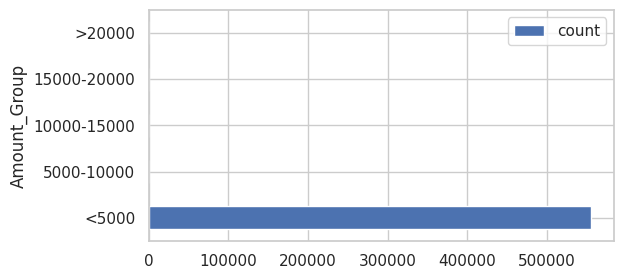

In [55]:
# univariate Analysis on Categorical Application data

for i in cat_col:
    print(100*(ccf_test[i].value_counts()/len(ccf_test.index)),2)
    plt.figure(figsize= (6,3))
    ccf_test[i].value_counts().plot.barh()
    plt.legend()
    plt.show()

is_fraud
0    99.614014
1     0.385986
Name: count, dtype: float64 2


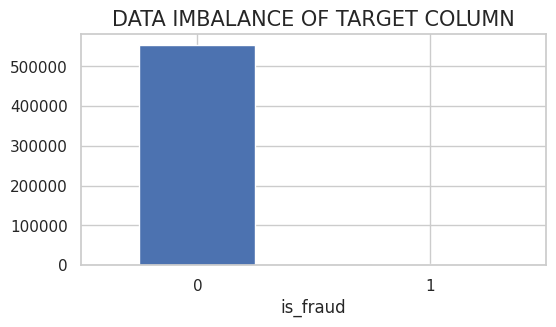

In [56]:
# Data imbalance in TARGET variable
print(100*(ccf_test['is_fraud'].value_counts()/len(ccf_test.index)),2)
plt.figure(figsize= (6,3))
ccf_test.is_fraud.value_counts().plot.bar()
plt.title('DATA IMBALANCE OF TARGET COLUMN',fontsize=15)
plt.xticks(rotation=0)
plt.show()

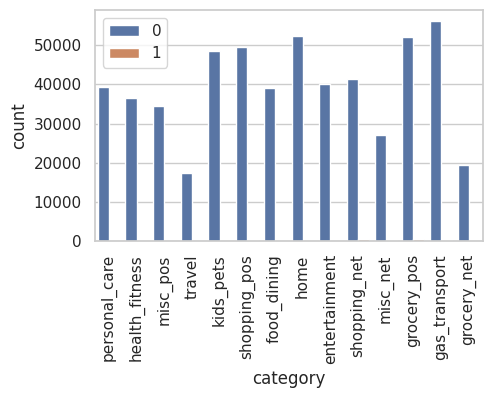

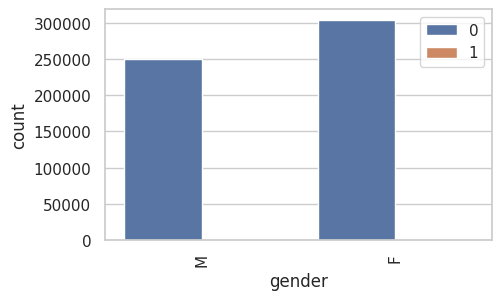

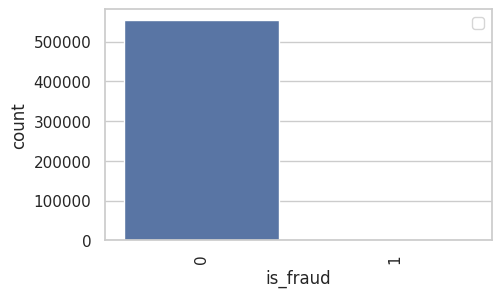

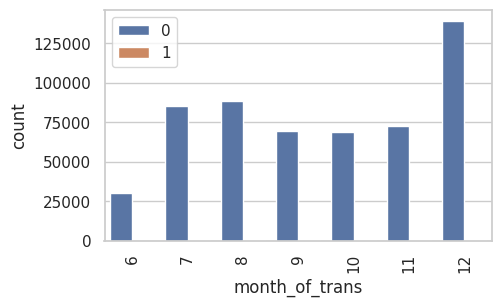

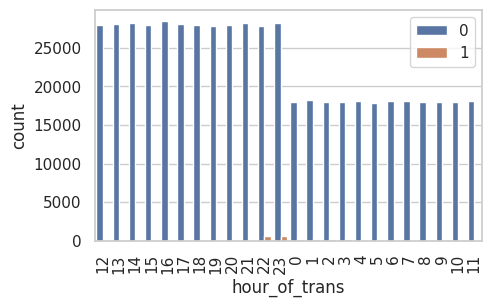

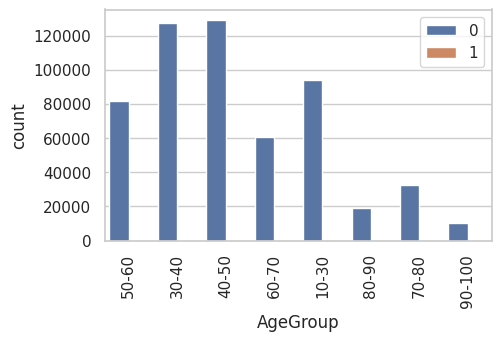

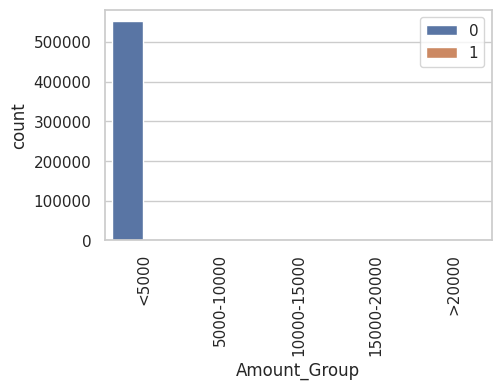

In [57]:
# Bivariate analysis between TARGET column and other categorical columns

for col in cat_col:
    ccf_test[col] = ccf_test[col].astype(str)

for i in cat_col:
    plt.figure(figsize= (5,3))
    sns.countplot(x = i, hue = 'is_fraud', data = ccf_test)
    plt.xticks(rotation = 90)
    plt.legend()
plt.show()

In [58]:
# Changing columns datatype

ccf_train['AgeGroup'] = ccf_train['AgeGroup'].astype('object')
ccf_train['Amount_Group'] = ccf_train['Amount_Group'].astype('object')

ccf_test['AgeGroup'] = ccf_test['AgeGroup'].astype('object')
ccf_test['Amount_Group'] = ccf_test['Amount_Group'].astype('object')

ccf_test['month_of_trans'] = ccf_test['month_of_trans'].astype('Int64')
ccf_test['day_of_trans'] = ccf_test['day_of_trans'].astype('Int64')
ccf_test['hour_of_trans'] = ccf_test['hour_of_trans'].astype('Int64')
ccf_test['min_of_trans'] = ccf_test['min_of_trans'].astype('Int64')
ccf_test['is_fraud'] = ccf_test['is_fraud'].astype('Int64')

In [59]:
ccf_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   category        1296675 non-null  object 
 1   amt             1296675 non-null  float64
 2   gender          1296675 non-null  object 
 3   zip             1296675 non-null  int64  
 4   city_pop        1296675 non-null  int64  
 5   unix_time       1296675 non-null  int64  
 6   is_fraud        1296675 non-null  Int64  
 7   Age             1296675 non-null  int32  
 8   month_of_trans  1296675 non-null  Int64  
 9   day_of_trans    1296675 non-null  Int64  
 10  hour_of_trans   1296675 non-null  Int64  
 11  min_of_trans    1296675 non-null  Int64  
 12  distance_km     1296675 non-null  float64
 13  AgeGroup        1296675 non-null  object 
 14  Amount_Group    1296675 non-null  object 
dtypes: Int64(5), float64(2), int32(1), int64(3), object(4)
memory usage: 149.6+ MB


In [60]:
# Removing age feature as it is a duplicate column and gender is not relieving any information can be dropped

ccf_train = ccf_train.drop(['Age', 'gender'], axis = 1)
ccf_test = ccf_test.drop(['Age', 'gender'],axis=1)

In [61]:
# Creating Dummy variables
object_columns = ['category', 'AgeGroup', 'Amount_Group']
print(object_columns)
dummies = pd.get_dummies(ccf_train[object_columns],drop_first=True)

['category', 'AgeGroup', 'Amount_Group']


In [62]:
# concatenating dummies to bank data
ccf_train = pd.concat([ccf_train,dummies],axis = 1)
ccf_train.head()

category     amt    zip  city_pop   unix_time  is_fraud  \
0       misc_net    4.97  28654      3495  1325376018         0   
1    grocery_pos  107.23  99160       149  1325376044         0   
2  entertainment  220.11  83252      4154  1325376051         0   
3  gas_transport   45.00  59632      1939  1325376076         0   
4       misc_pos   41.96  24433        99  1325376186         0   

   month_of_trans  day_of_trans  hour_of_trans  min_of_trans  distance_km  \
0               1             1              0             0    78.597568   
1               1             1              0             0    30.212176   
2               1             1              0             0   108.206083   
3               1             1              0             1    95.673231   
4               1             1              0             3    77.556744   

  AgeGroup Amount_Group  category_food_dining  category_gas_transport  \
0    30-40        <5000                 False                   False   
1    40-50        <5000                 False                   False   
2    50-60        <5000                 False                   False   
3    50-60        <5000                 False                    True   
4    30-40        <5000                 False                   False   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                 False                 False                    False   
1                 False                  True                    False   
2                 False                 False                    False   
3                 False                 False                    False   
4                 False                 False                    False   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0          False               False               True              False   
1          False               False              False              False   
2          False               False              False              False   
3          False               False              False              False   
4          False               False              False               True   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                   False                  False                  False   
1                   False                  False                  False   
2                   False                  False                  False   
3                   False                  False                  False   
4                   False                  False                  False   

   category_travel  AgeGroup_30-40  AgeGroup_40-50  AgeGroup_50-60  \
0            False            True           False           False   
1            False           False            True           False   
2            False           False           False            True   
3            False           False           False            True   
4            False            True           False           False   

   AgeGroup_60-70  AgeGroup_70-80  AgeGroup_80-90  AgeGroup_90-100  \
0           False           False           False            False   
1           False           False           False            False   
2           False           False           False            False   
3           False           False           False            False   
4           False           False           False            False   

   Amount_Group_15000-20000  Amount_Group_5000-10000  Amount_Group_<5000  \
0                     False                    False                True   
1                     False                    False                True   
2                     False                    False                True   
3                     False                    False                True   
4                     False                    False                True   

   Amount_Group_>20000  
0             

In [63]:
# dropping the duplicate columns

ccf_train.drop(object_columns, inplace =True, axis = 1)

In [64]:
for i in ccf_train.columns:
    if ccf_train[i].dtype == 'bool':
        ccf_train[i]=ccf_train[i].astype(int)

In [65]:
ccf_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 34 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   amt                       1296675 non-null  float64
 1   zip                       1296675 non-null  int64  
 2   city_pop                  1296675 non-null  int64  
 3   unix_time                 1296675 non-null  int64  
 4   is_fraud                  1296675 non-null  Int64  
 5   month_of_trans            1296675 non-null  Int64  
 6   day_of_trans              1296675 non-null  Int64  
 7   hour_of_trans             1296675 non-null  Int64  
 8   min_of_trans              1296675 non-null  Int64  
 9   distance_km               1296675 non-null  float64
 10  category_food_dining      1296675 non-null  int64  
 11  category_gas_transport    1296675 non-null  int64  
 12  category_grocery_net      1296675 non-null  int64  
 13  category_grocery_pos      1

In [66]:
# Creating Dummy variables  for test data

dummies2 = pd.get_dummies(ccf_test[object_columns],drop_first=True)

In [67]:
# concatenating dummies to bank data
ccf_test = pd.concat([ccf_test,dummies2],axis = 1)

In [68]:
# dropping the duplicate columns

ccf_test.drop(object_columns, inplace =True, axis = 1)

In [69]:
for i in ccf_test.columns:
    if ccf_test[i].dtype == 'bool':
        ccf_test[i]=ccf_test[i].astype(int)

In [70]:
ccf_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   amt                       555719 non-null  float64
 1   zip                       555719 non-null  int64  
 2   city_pop                  555719 non-null  int64  
 3   unix_time                 555719 non-null  int64  
 4   is_fraud                  555719 non-null  Int64  
 5   month_of_trans            555719 non-null  Int64  
 6   day_of_trans              555719 non-null  Int64  
 7   hour_of_trans             555719 non-null  Int64  
 8   min_of_trans              555719 non-null  Int64  
 9   distance_km               555719 non-null  float64
 10  category_food_dining      555719 non-null  int64  
 11  category_gas_transport    555719 non-null  int64  
 12  category_grocery_net      555719 non-null  int64  
 13  category_grocery_pos      555719 non-null  i

# Model Building

### Separate Train-test data alrady provided hence train-test split is not required

In [71]:
ccf_train.is_fraud.value_counts(normalize=True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: Float64

In [72]:
ccf_test.is_fraud.value_counts(normalize=True)

is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: Float64

#### MinMax scaling for numeric features

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [74]:
# Splitting train and test dataset into X and y

X_train = ccf_train.drop(['is_fraud'],axis=1)
y_train = ccf_train['is_fraud']

X_test = ccf_test.drop(['is_fraud'],axis=1)
y_test = ccf_test['is_fraud']

In [75]:
X_train.shape, y_train.shape

((1296675, 33), (1296675,))

In [76]:
ccf_train.columns

Index(['amt', 'zip', 'city_pop', 'unix_time', 'is_fraud', 'month_of_trans',
       'day_of_trans', 'hour_of_trans', 'min_of_trans', 'distance_km',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'AgeGroup_30-40', 'AgeGroup_40-50', 'AgeGroup_50-60', 'AgeGroup_60-70',
       'AgeGroup_70-80', 'AgeGroup_80-90', 'AgeGroup_90-100',
       'Amount_Group_15000-20000', 'Amount_Group_5000-10000',
       'Amount_Group_<5000', 'Amount_Group_>20000'],
      dtype='object')

In [77]:
# Checking the correlation

ccf_train[['is_fraud', 'amt', 'zip', 'city_pop', 'unix_time', 'month_of_trans', 'day_of_trans', 'hour_of_trans',
       'min_of_trans', 'distance_km', 'category_food_dining', 'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'AgeGroup_30-40',
       'AgeGroup_40-50', 'AgeGroup_50-60', 'AgeGroup_60-70', 'AgeGroup_70-80', 'AgeGroup_80-90', 'AgeGroup_90-100', 'Amount_Group_15000-20000',
       'Amount_Group_5000-10000', 'Amount_Group_<5000', 'Amount_Group_>20000']].corr(method='pearson', min_periods=1, numeric_only=False)

is_fraud       amt       zip  city_pop  unix_time  \
is_fraud                  1.000000  0.219404 -0.002162  0.002136  -0.005078   
amt                       0.219404  1.000000  0.001843  0.005818  -0.000293   
zip                      -0.002162  0.001843  1.000000  0.078467   0.000670   
city_pop                  0.002136  0.005818  0.078467  1.000000  -0.001714   
unix_time                -0.005078 -0.000293  0.000670 -0.001714   1.000000   
month_of_trans           -0.012409 -0.001748  0.000852  0.000137   0.184868   
day_of_trans              0.003848  0.000629 -0.000607  0.000159   0.017162   
hour_of_trans             0.013799 -0.022811  0.005938  0.020381   0.000756   
min_of_trans              0.001033  0.000383  0.000766 -0.000713   0.000006   
distance_km               0.000403 -0.001085  0.006183  0.010901  -0.000633   
category_food_dining     -0.015025 -0.033102 -0.004528  0.005798  -0.001337   
category_gas_transport   -0.004851 -0.014503 -0.000091 -0.022048  -0.000196   
category_grocery_net     -0.007136 -0.019831  0.000487  0.017569   0.000790   
category_grocery_pos      0.035558  0.094389 -0.001326 -0.002758   0.000059   
category_health_fitness  -0.014885 -0.026860  0.001971 -0.003465  -0.000161   
category_home            -0.017848 -0.024408 -0.000278 -0.002624   0.000381   
category_kids_pets       -0.014967 -0.024701  0.000043 -0.000917   0.000532   
category_misc_net         0.025886  0.014856  0.003606 -0.002028   0.000247   
category_misc_pos        -0.008937 -0.011905 -0.005800  0.004502   0.000657   
category_personal_care   -0.012167 -0.038303  0.002696  0.000405  -0.000681   
category_shopping_net     0.044261  0.032153  0.005773  0.003565  -0.000034   
category_shopping_pos     0.005955  0.018492  0.000691  0.011691   0.000006   
category_travel          -0.006924  0.046097 -0.004397 -0.002169  -0.000391   
AgeGroup_30-40           -0.009751  0.013952  0.015503  0.066924   0.005373   
AgeGroup_40-50           -0.009033  0.010566  0.012310 -0.003324  -0.006259   
AgeGroup_50-60            0.009224 -0.009918 -0.002937 -0.025990  -0.001605   
AgeGroup_60-70            0.002151 -0.010366  0.011722 -0.028125   0.012162   
AgeGroup_70-80            0.008961 -0.005315  0.002445 -0.048145   0.005430   
AgeGroup_80-90            0.007448 -0.002567 -0.006895 -0.035942   0.001080   
AgeGroup_90-100           0.002309 -0.002224 -0.001204 -0.034266   0.011811   
Amount_Group_15000-20000 -0.000134  0.172560  0.000122  0.002152  -0.000432   
Amount_Group_5000-10000  -0.000677  0.375932  0.000342  0.000417  -0.000449   
Amount_Group_<5000        0.000781 -0.563178  0.000126 -0.000570   0.000423   
Amount_Group_>20000      -0.000150  0.330076 -0.000871 -0.000462   0.000609   

                          month_of_trans  day_of_trans  hour_of_trans  \
is_fraud                       -0.012409      0.003848       0.013799   
amt                            -0.001748      0.000629      -0.022811   
zip                             0.000852     -0.000607       0.005938   
city_pop                        0.000137      0.000159       0.020381   
unix_time                       0.184868      0.017162       0.000756   
month_of_trans                  1.000000      0.012434      -0.000356   
day_of_trans                    0.012434      1.000000      -0.000170   
hour_of_trans                  -0.000356     -0.000170       1.000000   
min_of_trans                    0.000244     -0.000884      -0.000620   
distance_km                     0.000098     -0.000594       0.000332   
category_food_dining            0.000142     -0.000393       0.137651   
category_gas_transport          0.000222      0.000784      -0.360886   
category_grocery_net            0.000216      0.000195      -0.204825   
category_grocery_pos           -0.001745      0.000865      -0.337771   
category_health_fitness        -0.002282      0.000613       0.183372   
category_home                   0.000386     -0.001227       0.223394   
category_kids_pets 

### Beginning with Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logreg = LogisticRegression(random_state=42)

In [80]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Evaluating the model**

In [81]:
y_train_pred = logreg.predict(X_train)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
accuracy_score(y_train, y_train_pred)

0.993650683478898

In [84]:
confusion_matrix(y_train, y_train_pred)

array([[1288442,     727],
       [   7506,       0]])

In [85]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00   1289169
         1.0       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675



**Performance on test set**

In [86]:
y_test_pred = logreg.predict(X_test)

In [87]:
accuracy_score(y_test, y_test_pred)

0.9955139198047934

### Using RandomForest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [90]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [91]:
rf.oob_score_

0.9981282896639482

**Performance on the train set**

In [92]:
y_train_pred = rf.predict(X_train)

In [93]:
accuracy_score(y_train, y_train_pred)

0.999976863901903

In [94]:
confusion_matrix(y_train, y_train_pred)

array([[1289168,       1],
       [     29,    7477]])

In [95]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1289169
         1.0       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675



**Performance on unseen data**

In [96]:
y_test_pred = rf.predict(X_test)

In [97]:
accuracy_score(y_test, y_test_pred)

0.9985028404643354

In [98]:
confusion_matrix(y_test, y_test_pred)

array([[553492,     82],
       [   750,   1395]])

In [99]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.94      0.65      0.77      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.83      0.88    555719
weighted avg       1.00      1.00      1.00    555719



# Handling Imbalanced Dataset

Presence of minority class in the dataset.

Lets check out our target variable.

In [100]:
print(ccf_train.is_fraud.value_counts())
ccf_train.is_fraud.value_counts(normalize = True).reset_index()

is_fraud
0    1289169
1       7506
Name: count, dtype: Int64


is_fraud  proportion
0         0    0.994211
1         1    0.005789

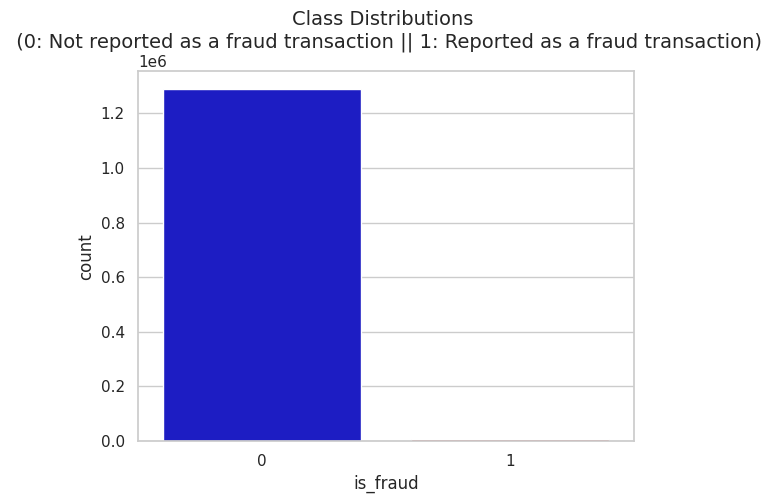

In [101]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='is_fraud', data=ccf_train, palette=colors)
plt.title('Class Distributions \n (0: Not reported as a fraud transaction || 1: Reported as a fraud transaction)', fontsize=14)
plt.show()


We can see that transactions reported as fraud are 0.58%. Therefore this is highly imbalanced data.
It is important to handle imbalanced classes as challenges related to imbalanced dataset are:
1. Biased predictions
2. Misleading accuracy

We can handle imbalanced classes by balancing the classes by increasing minority or decreasing majority.

We can do that by following few techniques
1. Random Under-Sampling
2. Random Over-Sampling
3. ADASYN - Adaptive Synthetic Sampling Method

### -- Use resampling methods only on training set, never on test set!

In [102]:
# Create Train and Test Sets
from sklearn.model_selection import train_test_split
X_train = ccf_train.drop(['is_fraud'],axis=1)
y_train = ccf_train['is_fraud']

X_test = ccf_test.drop(['is_fraud'],axis=1)
y_test = ccf_test['is_fraud']

In [103]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

is_fraud
0    1289169
1       7506
Name: count, dtype: Int64


is_fraud  proportion
0         0    0.994211
1         1    0.005789

In [104]:
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

is_fraud
0    553574
1      2145
Name: count, dtype: Int64


is_fraud  proportion
0         0     0.99614
1         1     0.00386

In [105]:
# Logistic Regression
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [106]:
lreg = LogisticRegression(random_state = 42)
lreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [107]:
y_pred = lreg.predict(X_test)

In [108]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9955139198047934
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719


 confussion matrix:
 [[553226    348]
 [  2145      0]]


Accuracy is misleadingly high (up to 99.6%) for baseline Logistic Regression However Precision, Recall, and F1-score are near zero in all cases.

This means Logitic Regression basic model basically predicting almost everything as non-fraud.

<u> Conclusion <u>: Not suitable for this dataset without significant rebalancing and feature engineering.

Random Under-Sampling

1. Randomly remove majority class observations
2. Help balance the dataset
3. Discarded observations could have important information
4. May lead to bias

In [109]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

15012

In [110]:
print(sorted(Counter(y_resampled_us).items()))

[(np.int64(0), 7506), (np.int64(1), 7506)]


In [111]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [112]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.9549790451649125
F1 score:  0.11415217930106575
Recall:  0.7515151515151515
Precision:  0.06176718522492145

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    553574
         1.0       0.06      0.75      0.11      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.55    555719
weighted avg       1.00      0.95      0.97    555719


 confussion matrix:
 [[529088  24486]
 [   533   1612]]


Random Over-Sampling

1. Randomly add more minority observations by replication
2. No information loss
3. Prone to overfitting due to copying same information

In [113]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

2578338

In [114]:
print(sorted(Counter(y_resampled_os).items()))

[(np.int64(0), 1289169), (np.int64(1), 1289169)]


In [115]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [116]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.9558050021683621
F1 score:  0.11603800748632306
Recall:  0.7515151515151515
Precision:  0.06287296696439018

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    553574
         1.0       0.06      0.75      0.12      2145

    accuracy                           0.96    555719
   macro avg       0.53      0.85      0.55    555719
weighted avg       1.00      0.96      0.97    555719


 confussion matrix:
 [[529547  24027]
 [   533   1612]]


ADASYN

1. In ADASYN, the minority examples are generated based on their density distribution.
2. More synthetic data are generated from minority class samples that are harder to learn as compared with those minority samples that are easier to learn.

In [117]:
# ADASYN
from imblearn.over_sampling import ADASYN
# ada = ADASYN(random_state=45, n_neighbors=5)

X_resampled_ada, y_resampled_ada = ADASYN(random_state=45, n_neighbors=5).fit_resample(
    X_train.astype(float),  # all features to float64
    y_train.astype(int)     # target to int
)

# X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

2579235

In [118]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 1289169), (1, 1290066)]


In [119]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [120]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.9442290078258976
F1 score:  0.09326818993007811
Recall:  0.7431235431235431
Precision:  0.04975652391060057

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    553574
         1.0       0.05      0.74      0.09      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.84      0.53    555719
weighted avg       1.00      0.94      0.97    555719


 confussion matrix:
 [[523132  30442]
 [   551   1594]]


#### Using Decision Tree

In [121]:
# Decision Trees - Random UnderSampling
from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us, y_resampled_us)

y_pred_dtc_us = dtc_us.predict(X_test)

In [122]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.9705336689945818
F1 score:  0.19710713410149547
Recall:  0.9370629370629371
Precision:  0.11013698630136987

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    553574
         1.0       0.11      0.94      0.20      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.95      0.59    555719
weighted avg       1.00      0.97      0.98    555719


 confussion matrix:
 [[537334  16240]
 [   135   2010]]


In [123]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [124]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9978136432261628
F1 score:  0.6560996320407586
Recall:  0.5403263403263403
Precision:  0.8350144092219021

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.84      0.54      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.92      0.77      0.83    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[553345    229]
 [   986   1159]]


In [125]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [126]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  0.9940959369753418
F1 score:  0.48517181860975994
Recall:  0.7207459207459207
Precision:  0.36565752128666035

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.37      0.72      0.49      2145

    accuracy                           0.99    555719
   macro avg       0.68      0.86      0.74    555719
weighted avg       1.00      0.99      1.00    555719


 confussion matrix:
 [[550892   2682]
 [   599   1546]]


<u>Observations:<u>

Random Under Sampling (RUS) improves Recall (0.94) but Precision is low (0.11), leading to a lot of false positives.

Random Over Sampling (ROS) has a balanced Precision (0.83) and moderate Recall (0.62), giving a strong F1-score (0.71).

ADASYN is in between (Precision 0.38, Recall 0.72, F1 0.50).

<u>Conclusion: <u>
Decision Tree with Random Over Sampling offers the best trade-off between catching fraud and avoiding too many false alarms.

# Random Forest

In [127]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [128]:
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [129]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9985028404643354
F1 score:  0.7702926559911651
Recall:  0.6503496503496503
Precision:  0.9444820582261341

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.94      0.65      0.77      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.83      0.88    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[553492     82]
 [   750   1395]]


In [130]:
# Random Forest - Random UnderSampling
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)

rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [131]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.9773212720817536
F1 score:  0.24419790104947525
Recall:  0.9491841491841492
Precision:  0.14012388162422573

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    553574
         1.0       0.14      0.95      0.24      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.96      0.62    555719
weighted avg       1.00      0.98      0.99    555719


 confussion matrix:
 [[541080  12494]
 [   109   2036]]


In [132]:
y_pred_train_rf_us = rf_us.predict(X_train)

In [133]:
print ('Accuracy: ', accuracy_score(y_train, y_pred_train_rf_us))
print ('F1 score: ', f1_score(y_train, y_pred_train_rf_us))
print ('Recall: ', recall_score(y_train, y_pred_train_rf_us))
print ('Precision: ', precision_score(y_train, y_pred_train_rf_us))
print ('\n clasification report:\n', classification_report(y_train,y_pred_train_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_train, y_pred_train_rf_us))

Accuracy:  0.9764659610156747
F1 score:  0.3297311544544017
Recall:  1.0
Precision:  0.19741202461732682

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99   1289169
         1.0       0.20      1.00      0.33      7506

    accuracy                           0.98   1296675
   macro avg       0.60      0.99      0.66   1296675
weighted avg       1.00      0.98      0.98   1296675


 confussion matrix:
 [[1258653   30516]
 [      0    7506]]


In [134]:
# Random Forest - Random Over-Sampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)

rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [135]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9984272626993138
F1 score:  0.7526881720430108
Recall:  0.62004662004662
Precision:  0.9575233981281498

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.96      0.62      0.75      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.81      0.88    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[553515     59]
 [   815   1330]]


In [151]:
# Random Forest - ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)

# Convert to numpy arrays so ADASYN won't try to preserve int64 dtypes
X_resampled_ada, y_resampled_ada = ada.fit_resample(
    X_train.to_numpy(dtype=float),
    y_train.to_numpy(dtype=int)
)

rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [152]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9985028404643354
F1 score:  0.7745257452574525
Recall:  0.6662004662004662
Precision:  0.9249190938511327

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    553574
         1.0       0.92      0.67      0.77      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.83      0.89    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[553458    116]
 [   716   1429]]


<u>Observation:<u>

Baseline gives high Precision (0.94) but lower Recall (0.65).

Random Under Sampling boosts Recall to 0.95 but at the cost of drop in precision

Random Over Sampling achieves high Precision (0.96) but Recall remains low (0.62).

ADASYN gives a balanced performance (Precision 0.93, Recall 0.66, F1 0.78) — highest F1-score here.

<u> Conclusion:<u>

As models main objective is to find out fraud detection with high accurancy - Random Forest under sampling can be used.

### Cost Benefit Analysis

In [153]:
# Creating dataframe of y_train_pred

y_pred_train_rf_us = pd.DataFrame(y_pred_train_rf_us)

In [154]:
# Merging the two dataframes

ccf_train_cb = pd.concat([ccf_train, y_pred_train_rf_us],axis=1)

In [155]:
# Creating dataframe of y_test_pred

y_pred_rf_us = pd.DataFrame(y_pred_rf_us)

In [156]:
# Merging the two dataframes

ccf_test_cb = pd.concat([ccf_test, y_pred_rf_us],axis=1)

In [157]:
# Merging both train and test dataset for cost benefit analysis

ccf_total = pd.concat([ccf_train_cb, ccf_test_cb],axis=0)

In [158]:
# Renaming column

ccf_total= ccf_total.rename(columns={ 0 : 'is_fraud_pred'})
ccf_total.head()

amt    zip  city_pop   unix_time  is_fraud  month_of_trans  \
0    4.97  28654      3495  1325376018         0               1   
1  107.23  99160       149  1325376044         0               1   
2  220.11  83252      4154  1325376051         0               1   
3   45.00  59632      1939  1325376076         0               1   
4   41.96  24433        99  1325376186         0               1   

   day_of_trans  hour_of_trans  min_of_trans  distance_km  \
0             1              0             0    78.597568   
1             1              0             0    30.212176   
2             1              0             0   108.206083   
3             1              0             1    95.673231   
4             1              0             3    77.556744   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  AgeGroup_30-40  AgeGroup_40-50  AgeGroup_50-60  \
0                0               1               0               0   
1                0               0               1               0   
2                0               0               0               1   
3                0               0               0               1   
4                0               1               0               0   

   AgeGroup_60-70  AgeGroup_70-80  AgeGroup_80-90  AgeGroup_90-100  \
0               0               0               0                0   
1               0               0               0                0   
2               0               0               0                0   
3               0               0               0                0   
4               0               0               0                0   

   Amount_Group_15000-20000  Amount_Group_5000-10000  Amount_Group_<5000  \
0                         0                        0                   1   
1                         0                        0                   1   
2                         0                        0                   1   
3                         0                        0                   1   
4                         0                        0                   1   

   Amount_Group_>20000  is_fraud_pred  
0                    0            0.0  
1                    0            0.0  
2                    0            0.0  
3                    0            0.0  
4                    0            0.0

In [159]:
# Average number of transactions per month

ccf_group = ccf_total.groupby(['month_of_trans'])
ccf_group.amt.count()

month_of_trans
1     104727
2      97657
3     143789
4     134970
5     146875
6     173869
7     172444
8     176118
9     140185
10    138106
11    143056
12    280598
Name: amt, dtype: int64

In [160]:
# Average number of transactions per month
ccf_total.amt.count()/24

np.float64(77183.08333333333)

In [161]:
# Average Number of fraudulent transactions per month

ccf_total[ccf_total['is_fraud']==1].amt.count()/24

np.float64(402.125)

In [162]:
# Average amount per fraud transaction

ccf_total[ccf_total['is_fraud']==1].amt.mean()

np.float64(530.661412288882)

In [163]:
# Average number of transactions per month detected as fraud by the model

ccf_total[ccf_total['is_fraud_pred']==1].amt.count()/24

np.float64(2189.6666666666665)

In [164]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = ccf_total.loc[(ccf_total.is_fraud_pred==0) & (ccf_total.is_fraud==1)]
Undetected_frauds.amt.count()/24

np.float64(4.541666666666667)